In [1]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
from utils.nolearn_net import NeuralNet
from utils.data_utils import *
from utils.iterator import BaseBatchIterator

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
import os
os.getcwd()

'/Users/thorey/Documents/project/competition/fognet'

In [3]:
from model_defs import lstm

# Load data 

In [4]:
data = load_raw_data()

# Preprocessing 

The training set consist of measurements every 2 hours on the station.
While the lag between most of measurements is 2h, some of them show a larger time difference.
We first use that to define some group in the training set.

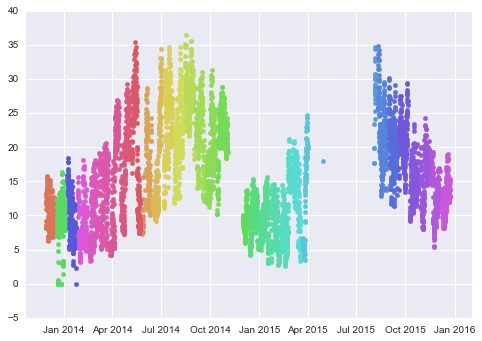

In [5]:
df_train =  add_group_column_to_data(data['micro_train'])
i= 0
for key,gp in df_train.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',len(df_train.groupby('group')))[i])
    i+=1

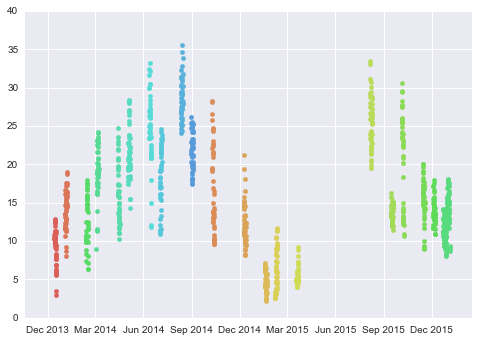

In [39]:
df_test =  add_group_column_to_data(data['micro_test'])
i= 0
for key,gp in df_test.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',len(df_train.groupby('group')))[i])
    i+=1

In [42]:
np.zeros((1,1))

array([[ 0.]])

In [62]:
(10,)+gp[gp.columns[:-3]].iloc[0:10].shape

(10, 10, 7)

In [60]:
a = gp[gp.columns[:-3]].iloc[0:10].shape
np.zeros((10,)+gp[gp.columns[:-3]].iloc[0:10].shape).shape

(10, 10, 7)

In [46]:
gp = train.groupby('group').get_group('group1')
X = np.zeros((nb_seqs, *gp[gp.feats].iloc[kmin:kmax]).shape)
y = np.zeros((nb_seqs, *gp[gp.labels].iloc[kmin:kmax].shape))

SyntaxError: invalid syntax (<ipython-input-46-f58a542d1ee9>, line 2)

## Train/Val/Test split

We are going to split that thing in three different group train/val/test

- I take the 20 first group for training
- I take the 7 that follows for validation
- I take the 8 remaining for testing

In [6]:
train,val,test = train_val_test_split(data['micro_train'],data['labels'])

Le train is composed by 19 group and 3354 observation
Le val is composed by 7 group and 1083 observation
Le test is composed by 8 group and 1361 observation


## Processing to feed the data to a RNN 

In [66]:
from sklearn.preprocessing import Imputer
inputer = Imputer(strategy='mean')
inputer.fit(train[train.columns[:-2]])
def df_transform(inputer,df):
    df_tmp = pd.DataFrame(inputer.transform(df[df.columns[:-2]]),
                          columns = df.columns[:-2],
                          index = df.index)
    return df_tmp.join(df[df.columns[-2:]])

In [123]:
from utils.iterator import *

In [143]:
batch_iterator = BaseBatchIterator(feats=train.columns.tolist()[:-2],
                                   label='yield',
                                   batch_size=5,
                                   size_seq=12,
                                   stride=1)
batch_iterator_train = batch_iterator(train_tmp)

In [281]:
X, y, mask = batch_iterator_train.stack_seqs.values()[0]
y2 = np.zeros(mask[1])
mask = mask[0].astype('int')
#for k in range(y2.shape[0]):
#    y2[k,mask[k,:]] = y[k]

In [279]:
np.mean(y2,axis=1).shape

(114,)

In [297]:
np.add.at(y2)

((114, 12), (114, 12))

In [308]:
a = np.random.randn(3,3)

In [328]:
a.shape,mask.shape,b.shape

((2, 4), (2, 2), (2, 2))

In [326]:
a = np.array([[1, 2, 3, 4],[1,2,3,4]])
mask = np.array([[0, 1],[0,1]])
b = np.array([[1,2],[1,1]])
np.add.at(a, mask,b)

ValueError: array is not broadcastable to correct shape

In [323]:
a

array([2, 4, 3, 4])

In [315]:
mask = np.array([[1,2],[2,1],[3,1]])
mask.shape

(3, 2)

In [317]:
b = np.random.randn(*mask.shape)

In [319]:
np.add.at(a,mask,b)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [304]:
np.add.at(y2.T[114],mask.T[114],y.T[114])

IndexError: index 114 is out of bounds for axis 0 with size 12

In [302]:
np.add.at(y2,mask,y)

IndexError: index 114 is out of bounds for axis 0 with size 114

In [295]:
y2

array([[ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [287]:
np.add.at?

In [282]:
y2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [274]:
np.add.at(y,y2)

ValueError: second operand needed for ufunc

In [270]:
y2.shape,mask.shape,y.shape

((114, 125), (114, 12), (114, 12))

In [266]:
np.add?

In [261]:
y2

array([[ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [239]:
mask

array([[  0,   1,   2, ...,   9,  10,  11],
       [  1,   2,   3, ...,  10,  11,  12],
       [  2,   3,   4, ...,  11,  12,  13],
       ..., 
       [111, 112, 113, ..., 120, 121, 122],
       [112, 113, 114, ..., 121, 122, 123],
       [113, 114, 115, ..., 122, 123, 124]])

In [240]:
y2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [230]:
y2[100,mask[100,:]] = y[100]

In [241]:
for k in range(y2.shape[0]):
    y2[k,mask[k,:]] = y[k]

In [246]:
y2[100,:]

array([  0.00000000e+00,   0.00000000e+00,   2.39687848e+00,
         6.41722408e+00,   2.09030100e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [166]:
y2.shape

(114, 125)

In [175]:
y[0,:]

array([ 6.41722408,  0.02090301,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [177]:
y2[0,:]

array([  0.00000000e+00,   0.00000000e+00,   2.39687848e+00,
         6.41722408e+00,   2.09030100e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [154]:
y2.shape

(114, 125)

In [148]:
np.apply_along_axis(int,mask[0])

TypeError: apply_along_axis() takes at least 3 arguments (2 given)

In [144]:
X, y, mask = batch_iterator_train.stack_seqs.values()[0]

In [140]:
np.apply_along_axis(int,mask[0])

TypeError: apply_along_axis() takes at least 3 arguments (2 given)

In [146]:
mask[0][0,1]

1.0

In [139]:
y2[mask[0]]

IndexError: arrays used as indices must be of integer (or boolean) type

In [136]:
mask[0]

array([[   0.,    1.,    2., ...,    9.,   10.,   11.],
       [   1.,    2.,    3., ...,   10.,   11.,   12.],
       [   2.,    3.,    4., ...,   11.,   12.,   13.],
       ..., 
       [ 111.,  112.,  113., ...,  120.,  121.,  122.],
       [ 112.,  113.,  114., ...,  121.,  122.,  123.],
       [ 113.,  114.,  115., ...,  122.,  123.,  124.]])

In [133]:
np.add.at(y2,y,mask)

IndexError: arrays used as indices must be of integer (or boolean) type

In [101]:
batch_iterator_train.__iter__()

<generator object __iter__ at 0x13df1cd20>

In [97]:
for X,y,yb,yb in batch_iterator_train:
    print(y,mask)
    sys.exit()

ValueError: need more than 2 values to unpack

In [90]:
range(1,3)

[1, 2]

In [79]:
X,y,Xa,ya = batch_iterator_train.stack_seqs.values()[0]
np.allclose(X,Xa)

True

In [83]:
for X,y in batch_iterator_train:
    print(X.shape,y.shape)
    sys.exit()

(5, 12, 9) (5, 12)


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


# RNN MODEL 

In [9]:
import theano.tensor as TT 
import lasagne
## Parameters
# batch size : N
# Seq length : T
# Num features : D
# Size hidden layer

D = 9
H = 100
GRAD_CLIP = 10
# First, we build the network, starting with an input layer
# Recurrent layers expect input of shape
# (batch size, SEQ_LENGTH, num_features)

l_in = lasagne.layers.InputLayer(name='in', 
                                 shape=(None, None, D))
batchsize, seqlen, _ = l_in.input_var.shape

# We now build the LSTM layer which takes l_in as the input layer
# We clip the gradients at GRAD_CLIP to prevent the problem of exploding
# gradients.

l_lstm = lasagne.layers.LSTMLayer(l_in, 
                                     H,
                                     name='lstm',
                                     grad_clipping=GRAD_CLIP,
                                     nonlinearity=lasagne.nonlinearities.tanh)
l_shp = lasagne.layers.ReshapeLayer(l_lstm, (-1, H))
l_dense = lasagne.layers.DenseLayer(l_shp, 
                                    num_units=1,
                                   name = 'dense',
                                   nonlinearity = lasagne.nonlinearities.identity)
l_out = lasagne.layers.ReshapeLayer(l_dense, (batchsize, seqlen))

In [10]:
a = {'a':1,'b':2}

In [34]:
from utils.nolearn_net import NeuralNet
net = NeuralNet(
    layers=l_out,
    regression=True,
    objective_loss_function=lasagne.objectives.squared_error,
    objective_l2=1e-3,
    update=lasagne.updates.adam,
    update_learning_rate=1e-4,
    train_split = False,
    batch_iterator_train=batch_iterator_train,
    batch_iterator_test=batch_iterator_val,
    verbose=15,
    max_epochs=10000,
)
net.initialize()

net.fit(epochs = 10)

# Neural Network with 44401 learnable parameters

## Layer information

  #  name    size
---  ------  --------
  0  in      Nonex9
     lstm    Nonex100
             100
     dense   1
             None

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       9.96323       9.54884      1.04340  4.00s
      2      10.13170       9.77687      1.03629  4.01s
      3      10.00783      10.02998      0.99779  4.01s
      4       9.93105       9.61941      1.03240  4.07s
      5       9.83008       9.77332      1.00581  4.03s
      6      10.24527       9.73597      1.05231  4.00s
      7       9.88311       9.46508      1.04417  4.03s
      8       9.71289       9.49263      1.02320  4.11s
      9       9.66607       9.33275      1.03571  4.16s
     10       9.58224       9.26263      1.03451  4.05s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<utils.iterator.BaseBatchIterator object at 0x1171c2150>,
     batch_iterator_train=<utils.iterator.BaseBatchIterator object at 0x1171c2150>,
     custom_scores=None,
     layers=[<lasagne.layers.shape.ReshapeLayer object at 0x118f5cc50>],
     loss=None, max_epochs=10000, more_params={},
     objective=<function objective at 0x11641ccf8>, objective_l2=0.001,
     objective_loss_function=<function squared_error at 0x11621f1b8>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x137262488>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x1372624d0>],
     regression=True, train_split=False,
     update=<function adam at 0x116224410>, update_learning_rate=0.0001,
     use_label_encoder=False, verbose=15,
     y_tensor_type=TensorType(float64, matrix))

In [23]:
net._get_params_for('objective')

{'l2': 0.0, 'loss_function': <function lasagne.objectives.squared_error>}

In [24]:
np.mean(lasagne.objectives.squared_error(net.apply_batch_func(net.predict_iter_, Xb),yb))

1.0449939224204698

In [73]:
from sklearn.metrics import mean_squared_error

In [36]:
net.get_score_whole_set('test')

9.1914617758542541

In [14]:
from sklearn.metrics import mean_squared_error

In [16]:
pred = []
target = []
for Xb,yb in batch_iterator_train:
    pred.append(mean_squared_error(net.apply_batch_func(net.predict_iter_, Xb),yb))
pred = np.array(pred)

In [18]:
np.sqrt(np.mean(pred))

3.7476773361585503

In [35]:
mean_squared_error(net.apply_batch_func(net.predict_iter_, Xb),yb)

0.14033050987307397

In [69]:
lasagne.objectives.aggregate?

In [61]:
net.apply_batch_func(net.eval_iter_, Xb, yb)

[array(0.45936805094318883), array(0.45936805094318883)]

In [29]:
valid_losses = []
valid_accuracies= []
for Xb, yb in net.batch_iterator_test:
    batch_valid_loss2, accuracy2 = net.get_score(Xb, yb),net.get_score(Xb, yb)
    batch_valid_loss, accuracy = net.apply_batch_func(net.eval_iter_, Xb, yb)
    valid_losses.append([batch_valid_loss,batch_valid_loss2])
    valid_accuracies.append([accuracy,accuracy2])

In [31]:
np.mean(valid_losses,axis=0),np.sum(valid_accuracies,axis= 0)

(array([ 10.45994096,   2.15503139]), array([ 2133.82795635,   439.62640414]))

In [21]:
for i, (Xb,yb) in enumerate(batch_iterator_val):
    print(net.apply_batch_func(net.eval_iter_, Xb, yb))
    if i >2:
        sys.exit()

[array(0.11667825419087607), array(0.11667825419087607)]
[array(0.11904364708938715), array(0.11904364708938715)]
[array(0.09242973349573437), array(0.09242973349573437)]
[array(0.08429630374667692), array(0.08429630374667692)]


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
batch_valid_loss

In [19]:
net.get_score_whole_set('train')

1.468002517991347

In [114]:
scores_predict = []
scores_true = []
for Xb,yb in batch_iterator_val:
    scores_predict.append(net.predict(Xb))
    scores_true.append(yb)

In [ ]:
sco

In [80]:
import os

In [83]:
os.path.expanduser

<function posixpath.expanduser>

In [84]:
root = '/Users/thorey/Documents/project/competition/fognet/models/lstm/model_0'

In [86]:
import json

In [89]:
with open(os.path.join(root,'conf_model.json')) as f:
    conf = json.load(f)

In [34]:
data = Data()

In [41]:
from utils.data_utils import *

In [42]:
        inputer = MyImputer(strategy='mean')
        inputer.fit(train[train.columns[:-2]])

MyImputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [46]:
data.process_data_benchmark()

Le train is composed by 19 group and 3354 observation
Le val is composed by 7 group and 1083 observation
Le test is composed by 8 group and 1361 observation


(<utils.iterator.BaseBatchIterator at 0x12a78dcd0>,
 <utils.iterator.BaseBatchIterator at 0x12a78dcd0>)

In [57]:
import importlib

In [71]:
architecture = importlib.import_module('model_defs.lstm')
builder = getattr(architecture,'build_simple_lstm')
builder(D=2, H=100, GRAD_CLIP=10)

In [79]:
len(batch_iterator_train.feats)

9

In [74]:
for Xb,yb in batch_iterator_val:
    print(Xb.shape,Xb)
    sys.exit()

(5, 24, 9) [[[   0.            0.31970725   16.09583333 ...,    1.89463333  123.875
      1.75630833]
  [   0.            0.33959684   15.39166667 ...,    2.351525    127.66666667
      2.1126    ]
  [   0.            0.3518744    14.75       ...,    2.28026667  133.25
      2.03715   ]
  ..., 
  [   0.            0.21601246   16.625      ...,    3.458125     86.
      2.88386667]
  [   0.            0.22197128   16.025      ...,    3.99046667
     82.29166667    3.18566667]
  [   0.            0.24527263   15.36666667 ...,    3.6216       79.29166667
      3.09345   ]]

 [[   0.            0.33959684   15.39166667 ...,    2.351525    127.66666667
      2.1126    ]
  [   0.            0.3518744    14.75       ...,    2.28026667  133.25
      2.03715   ]
  [   0.            0.34813538   14.95833333 ...,    2.14613333
    141.04166667    1.92816667]
  ..., 
  [   0.            0.22197128   16.025      ...,    3.99046667
     82.29166667    3.18566667]
  [   0.            0.24527263   15.

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [56]:
    getattr(lasagne.objectives,'squared_error')

<function lasagne.objectives.squared_error>

In [53]:
getattr(data,'process_data_benchmark')()

Le train is composed by 19 group and 3354 observation
Le val is composed by 7 group and 1083 observation
Le test is composed by 8 group and 1361 observation


(<utils.iterator.BaseBatchIterator at 0x12a78d0d0>,
 <utils.iterator.BaseBatchIterator at 0x12a78d0d0>)

In [10]:
net.batch_iterator_train = batch_iterator_train
net.batch_iterator_test = batch_iterator_val
net.initialize()

In [26]:
net.get_score_whole_set('test')

1.3686325759270976

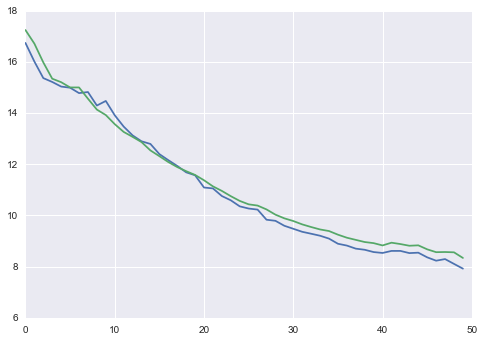

In [16]:
plt.plot([f['valid_loss'] for f in net.train_history_])
plt.plot([f['train_loss'] for f in net.train_history_])

In [2]:
import numpy as np
np.sqrt(3.8)

1.9493588689617927

In [20]:
net.predict()

array([[ 0.91455285,  0.05339446, -0.03429878, ..., -0.08039147,
        -0.07265196, -0.03766962],
       [ 1.13275435,  0.13893034, -0.03259964, ..., -0.07209404,
        -0.03736325,  0.08674202],
       [ 1.31006544,  0.15349411, -0.00247873, ..., -0.03683145,
         0.0877185 ,  0.16245854],
       ..., 
       [ 0.02781247, -0.34743854, -0.27740044, ...,  0.13347038,
        -0.22354135,  0.23109068],
       [ 0.5709322 , -0.23337237, -0.06095584, ..., -0.22228495,
         0.2327262 ,  0.04284291],
       [ 0.78388102, -0.03150363, -0.03977821, ...,  0.234507  ,
         0.04353782, -0.18843932]])

In [ ]:
for Xb,yb in 